In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

#### Importing data

In [2]:
data = pd.read_csv("bank-full.csv",sep = ';') 

In [3]:
data.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


+ y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.shape

(45211, 17)

#### EDA 

In [6]:
label = LabelEncoder()

In [7]:
df = data.copy()

In [8]:
for col in df.columns.to_list():
    if df[col].dtype == object:
        df[col] = label.fit_transform(df[col])

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [10]:
print(f"There are any null values in the data :- {df.isnull().values.any()}")

There are any null values in the data :- False


In [11]:
X = df.iloc[:,:16]
y = df.iloc[:,16]

In [12]:
X.shape,y.shape

((45211, 16), (45211,))

### Checking the suitablity of data to be used to build model

Text(0, 0.5, ' Frequency ')

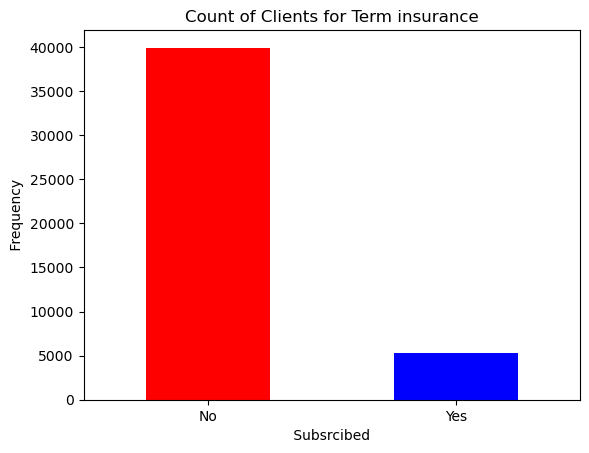

In [13]:
count_classes = pd.value_counts(df['y'],sort=True)
count_classes.plot(kind = 'bar',rot = 0,color ={'blue','red'})
plt.title("Count of Clients for Term insurance")
plt.xticks(range(2),labels=['No','Yes'])
plt.xlabel(" Subsrcibed ")
plt.ylabel(" Frequency ")

In [14]:
## Get the subscribed and not subscribed seperatly to check 
subscribed = df[df['y'] == 1]
un_subscribed = df[df['y'] == 0]
print(subscribed.shape,un_subscribed.shape)

(5289, 17) (39922, 17)


### It can be seen the data set is highly imbalanced 

+ Approach 1 :- By Under sampling the Data

In [15]:
nm = NearMiss()
x_res,y_res = nm.fit_resample(X,y)

In [16]:
x_res.shape,y_res.shape

((10578, 16), (10578,))

#### Verifying the suitablity of data to be used in model building

In [17]:
df_res = pd.DataFrame(x_res,y_res)

In [18]:
df_res.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
0,28,3,2,1,0,1,1,0,0,12,8,395,2,-1,0,3
0,28,3,2,1,0,1,1,0,0,12,8,395,2,-1,0,3
0,28,3,2,1,0,1,1,0,0,12,8,395,2,-1,0,3
0,28,3,2,1,0,1,1,0,0,12,8,395,2,-1,0,3
0,28,3,2,1,0,1,1,0,0,12,8,395,2,-1,0,3


Text(0, 0.5, ' Frequency ')

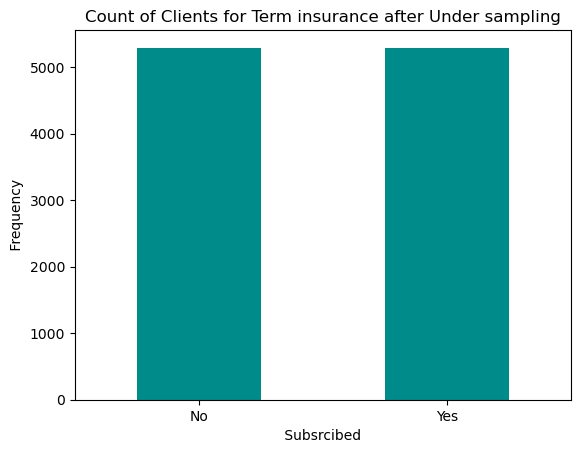

In [19]:
count_classes = pd.value_counts(df_res.index,sort=True)
count_classes.plot(kind = 'bar',rot = 0,color = {'#008b8b'})
plt.title("Count of Clients for Term insurance after Under sampling")
plt.xticks(range(2),labels=['No','Yes'])
plt.xlabel(" Subsrcibed ")
plt.ylabel(" Frequency ")

In [20]:
## Verifying the data set after under sampling 
subscribed = y_res[y_res == 1]
un_subscribed = y_res[y_res == 0]
print(f"""
           The number of Clients in Data set subscribed to Term Insurance :- {len(subscribed.to_list())} 
           The number of Clients in Data set subscribed to Term Insurance :- {len(un_subscribed.to_list())}""")


           The number of Clients in Data set subscribed to Term Insurance :- 5289 
           The number of Clients in Data set subscribed to Term Insurance :- 5289


### The data set now has equal number of possible choices of Dependent Variables after under sampling hence it is perfectly balanced 

### Splitting the data into train and test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [22]:
X_train.shape,y_train.shape

((8462, 16), (8462,))

In [23]:
X_test.shape,y_test.shape

((2116, 16), (2116,))

## Model Building 

In [24]:
model=LogisticRegression(max_iter=5000,random_state=42)

In [25]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000, random_state=42)

+ Predict training data and get training metrics 

#### Metric Evaluation

In [26]:
y_pred = model.predict(X_train)

### The confusion matrix for Train Data

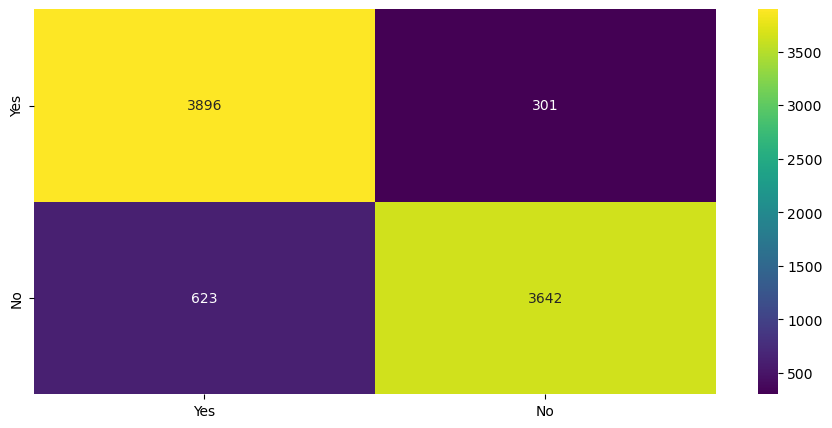

In [27]:
def plot_confusion_matrix(cm, classes = ['Yes', 'No'], cmap='viridis'):
    plt.figure(figsize=[11, 5])
    norm_cm = cm.astype('int')
    sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)


cm = confusion_matrix(y_train, y_pred)
#call the confusion matrix function         
plot_confusion_matrix(cm)

### Classification Report for Train Data

In [28]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4197
           1       0.92      0.85      0.89      4265

    accuracy                           0.89      8462
   macro avg       0.89      0.89      0.89      8462
weighted avg       0.89      0.89      0.89      8462



### AUC_ROC curve for Train Data

Text(0, 0.5, 'True Positive Rate')

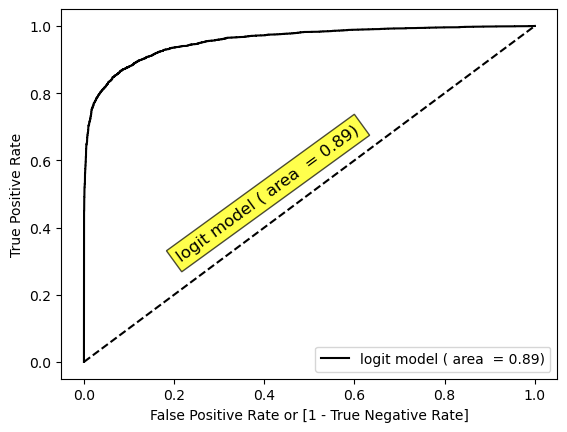

In [29]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train, y_pred)

x= 10
plt.plot(fpr, tpr, 
         color='black', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'yellow', alpha = 0.7))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### From the AUC_ROC curve it is visble that model is able to classify 89 % of training data, next we check it for the testing data to see the performance of our model on Testing Data

In [30]:
y_test_pred = model.predict(X_test)

### Confusion Matrix for Test Data

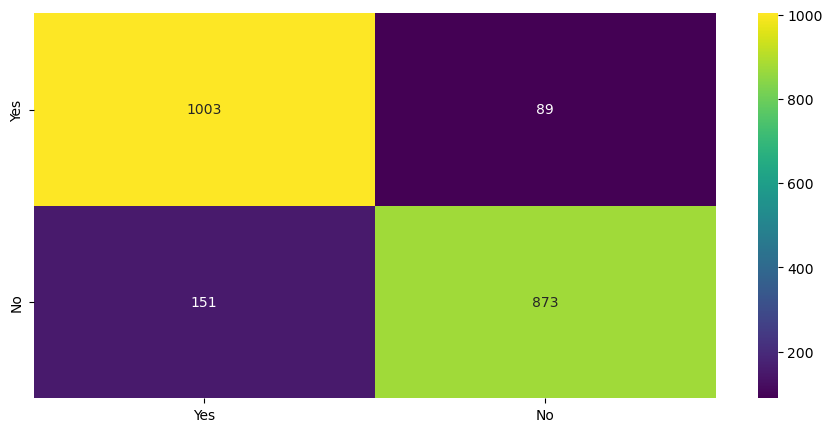

In [31]:
cm = confusion_matrix(y_test,y_test_pred)
#call the confusion matrix function         
plot_confusion_matrix(cm)

### Classification Report for the Test Data

In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1092
           1       0.91      0.85      0.88      1024

    accuracy                           0.89      2116
   macro avg       0.89      0.89      0.89      2116
weighted avg       0.89      0.89      0.89      2116



### AUC_ROC curve for the Test data

Text(0, 0.5, 'True Positive Rate')

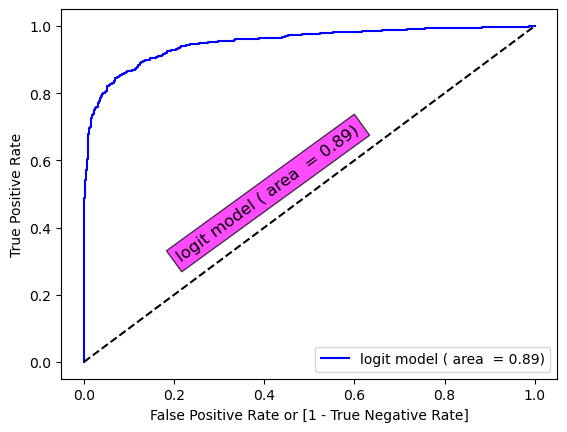

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test, y_test_pred)

x= 10
plt.plot(fpr, tpr, 
         color='blue', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'magenta', alpha = 0.7))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### For Undersampled Data the Training and Testing accuracy both are 89 %

+ Approach 2 :- By over-sampling the imbalanced Data

In [34]:
ros = RandomOverSampler(random_state=42)

In [35]:
print(X.shape,y.shape)

(45211, 16) (45211,)


In [36]:
X_over,y_over = ros.fit_resample(X,y)

In [37]:
print(X_over.shape,y_over.shape)

(79844, 16) (79844,)


#### Verify the Data Dustribution after oversampling 

In [38]:
df_over = pd.DataFrame(X_over,y_over)

In [39]:
df_over.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3


Text(0, 0.5, ' Frequency ')

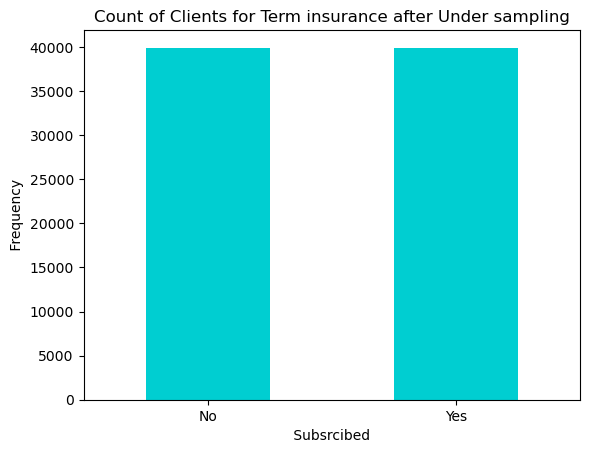

In [40]:
count_classes = pd.value_counts(df_over.index,sort=True)
count_classes.plot(kind = 'bar',rot = 0,color = {'#00ced1'})
plt.title("Count of Clients for Term insurance after Under sampling")
plt.xticks(range(2),labels=['No','Yes'])
plt.xlabel(" Subsrcibed ")
plt.ylabel(" Frequency ")

In [41]:
## Verifying the data set after under sampling 
subscribed = y_over[y_over == 1]
un_subscribed = y_over[y_over == 0]
print(f"""
           The number of Clients in Data set subscribed to Term Insurance :- {len(subscribed.to_list())} 
           The number of Clients in Data set subscribed to Term Insurance :- {len(un_subscribed.to_list())}""")


           The number of Clients in Data set subscribed to Term Insurance :- 39922 
           The number of Clients in Data set subscribed to Term Insurance :- 39922


### The data set now has equal number of possible choices of Dependent Variables after under over-sampling hence it is perfectly balanced 

## Dividing the Data into Train and Test 

In [42]:
Xo_train,Xo_test,yo_train,yo_test = train_test_split(X_over,y_over,test_size=0.2,random_state=42)

In [43]:
print(Xo_train.shape,yo_train.shape)

(63875, 16) (63875,)


In [44]:
print(Xo_test.shape,yo_test.shape)

(15969, 16) (15969,)


### Model Building 

In [45]:
modelO = LogisticRegression(max_iter=5000)

In [46]:
modelO.fit(Xo_train,yo_train)

LogisticRegression(max_iter=5000)

In [47]:
yO_pred = modelO.predict(Xo_train)

### Confusion matrix - Training Data (Oversampled)

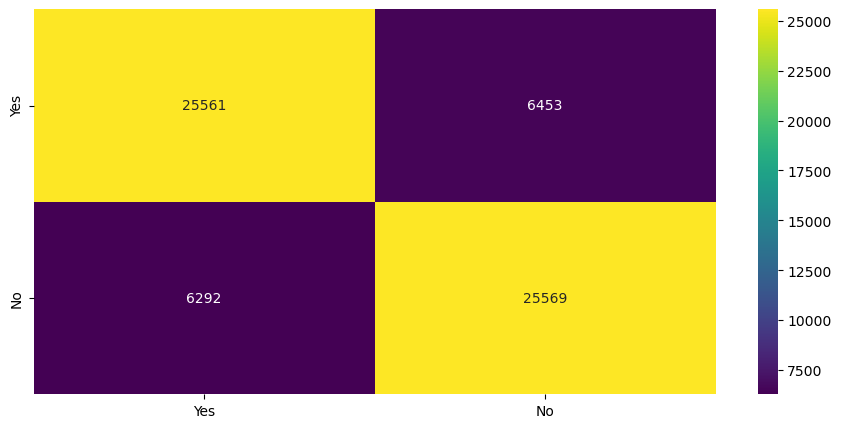

In [48]:
cm = confusion_matrix(yo_train,yO_pred)
#call the confusion matrix function         
plot_confusion_matrix(cm)

### Classification Report --Train Data (Oversampled)

In [49]:
print(classification_report(yo_train,yO_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     32014
           1       0.80      0.80      0.80     31861

    accuracy                           0.80     63875
   macro avg       0.80      0.80      0.80     63875
weighted avg       0.80      0.80      0.80     63875



### AUC_ROC curve :- Training Data (Oversampled)

Text(0, 0.5, 'True Positive Rate')

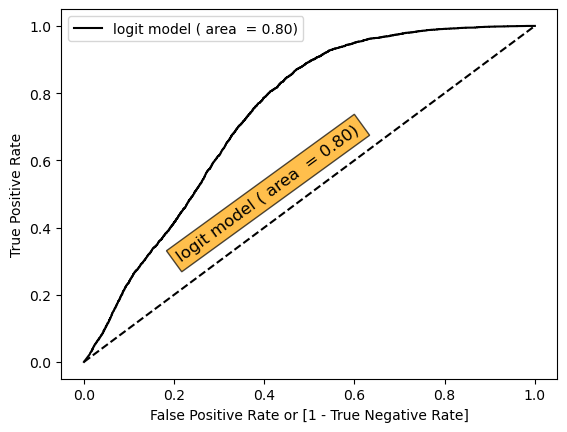

In [50]:
fpr, tpr, thresholds = roc_curve(yo_train, model.predict_proba(Xo_train)[:,1])

auc = roc_auc_score(yo_train, yO_pred)

x= 10
plt.plot(fpr, tpr, 
         color='black', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'orange', alpha = 0.7))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Incase of over sampling the accuracy of model on testing data is 80 %

In [51]:
yo_test_pred = modelO.predict(Xo_test)

### Confusion matrix - Test Data (Oversampled)

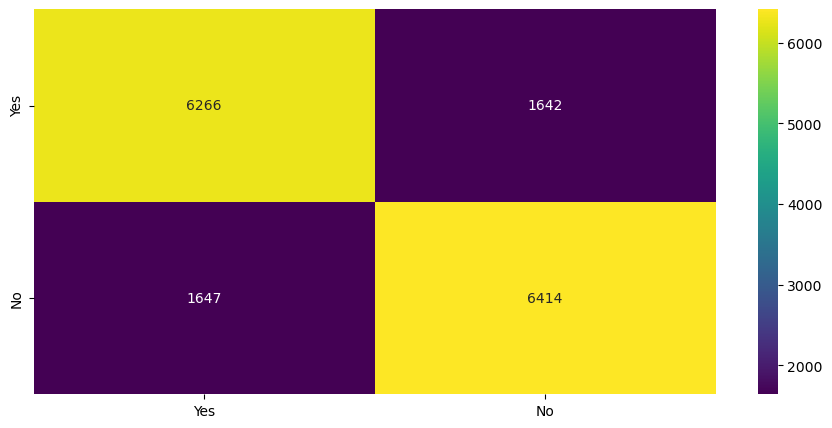

In [52]:
cm = confusion_matrix(yo_test,yo_test_pred)
#call the confusion matrix function         
plot_confusion_matrix(cm)

### Classification Report --Test Data (Oversampled)

In [53]:
print(classification_report(yo_test,yo_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7908
           1       0.80      0.80      0.80      8061

    accuracy                           0.79     15969
   macro avg       0.79      0.79      0.79     15969
weighted avg       0.79      0.79      0.79     15969



### AUC_ROC curve :- Test Data (Oversampled)

Text(0, 0.5, 'True Positive Rate')

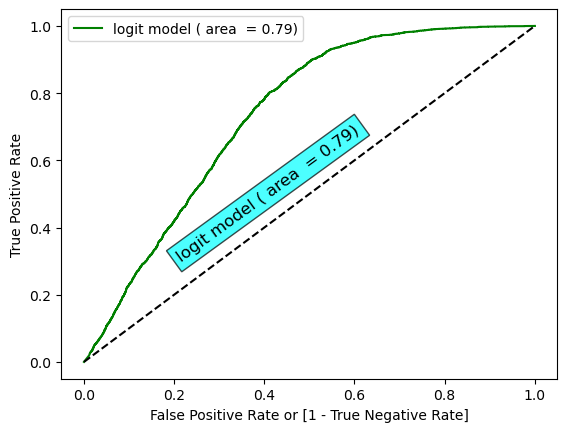

In [54]:
fpr, tpr, thresholds = roc_curve(yo_test, model.predict_proba(Xo_test)[:,1])

auc = roc_auc_score(yo_test, yo_test_pred)

x= 10
plt.plot(fpr, tpr, 
         color='green', 
         label='logit model ( area  = %0.2f)'%auc
        )
plt.text(0.2, 0.3, 
         'logit model ( area  = %0.2f)'%auc, 
         fontsize = 12,  
         rotation = 36,
        bbox = dict(facecolor = 'cyan', alpha = 0.7))


plt.plot([0, 1], [0, 1], 'k--')
plt.legend()

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### The accuracy of model build on oversampled data (79844 data points)
+ for training data is 80 % 
+ whereas that for the unseen(testing) data is 79 % 